# Analysis of Global Nucleosome Positioning in *Arabidopsis thaliana*
**Author**: Emma Tung Corcoran </br>
**Date Last Modified**: July 27, 2021 </br>
**Description**: Micrococcal nuclease digestion with deep sequencing (MNase-seq) is a molecular biology technique that measures nucleosome occupancy across the whole genome. After processing paired-end MNase-seq data using the workflow here: https://github.com/etc27/MNaseseq-workflow/blob/main/README.md, tpm counts are generated corresponding to each gene.

In [1]:
#Load required dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#Set path to save plot
save_path = "/Users/emmacorcoran/Documents/Jupyter Code/2021_05_24_MNase"

## Whole Gene Body
### Load and clean data

In [3]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/featurecounts/"
filename = "featurecounts_TPM.tab"
path_to_file = os.path.join(base_path, filename)
tpm_data = pd.read_csv(path_to_file, sep='\t')

In [4]:
tpm_data.head()

,idGene,final_counts_13-6.txt,final_counts_68-18D.txt,final_counts_arid5.txt,final_counts_Col.txt
0,AT1G01010,20.954620,24.090491,25.066619,27.649325
1,AT1G01020,16.078641,19.560498,17.097994,17.141686
2,AT1G03987,19.546504,34.706313,25.910654,24.250398
3,AT1G01030,23.454724,22.625269,21.963835,26.747690
4,AT1G01040,20.067776,19.363514,20.772528,20.051489


In [ ]:
#Subsection for protein-coding genes
proteincoding_1to5
base_path = "/Users/emmacorcoran/Documents/Desktop/annotations"
filename = "proteincoding_1to5.txt"
path_to_file = os.path.join(base_path, filename)
tpm_data = pd.read_csv(path_to_file, sep='\t')

In [5]:
#Remove ChrM and ChrC reads
def remove_MC(df):
    df = df[tpm_data['idGene'].str.contains('ATM') != True]
    df = df[tpm_data['idGene'].str.contains('ATC') != True]
    return df

In [6]:
df_noMC = remove_MC(tpm_data)
df_noMC.head()

<ipython-input-5-fbe71e2c925a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[tpm_data['idGene'].str.contains('ATC') != True]


,idGene,final_counts_13-6.txt,final_counts_68-18D.txt,final_counts_arid5.txt,final_counts_Col.txt
0,AT1G01010,20.954620,24.090491,25.066619,27.649325
1,AT1G01020,16.078641,19.560498,17.097994,17.141686
2,AT1G03987,19.546504,34.706313,25.910654,24.250398
3,AT1G01030,23.454724,22.625269,21.963835,26.747690
4,AT1G01040,20.067776,19.363514,20.772528,20.051489


#### Make boxplot of nucleosome read coverage over genes

In [7]:
df = df_noMC.iloc[:,1:]
df.columns = ['13-6', '68-18D', 'arid5', 'Col']
df = df[['Col', '68-18D', '13-6', 'arid5']]

In [8]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 20})

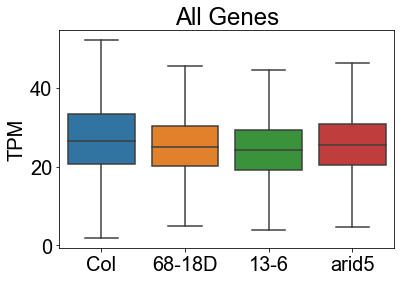

In [9]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), showfliers = False)
plt.title("All Genes")
plt.ylabel("TPM")
plt.xlabel("")
#plt.show()
filename = "Nucleosome Read Coverage/all_samples"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

### T-test

In [10]:
print("Col vs 68-18D:", ttest_ind(df['Col'], df['68-18D']))
print("13-6 vs 68-18D:", ttest_ind(df['13-6'], df['68-18D']))
print("Col vs 13-6:", ttest_ind(df['Col'], df['13-6']))
print("Col vs arid5:", ttest_ind(df['Col'], df['arid5']))

Col vs 68-18D: Ttest_indResult(statistic=5.499512261687695, pvalue=3.82248764408888e-08)
13-6 vs 68-18D: Ttest_indResult(statistic=-2.014434878149784, pvalue=0.04396793735620536)
Col vs 13-6: Ttest_indResult(statistic=7.039342379089978, pvalue=1.9502256812672282e-12)
Col vs arid5: Ttest_indResult(statistic=4.980911631802807, pvalue=6.344459379758365e-07)
